## IT Department Management Staffing Analysis (Flag 37)

### Dataset Overview
This dataset contains 500 simulated records from the ServiceNow `sys_user` table. The `sys_user` table captures user-related information, detailing the profiles of employees or system users. Key fields include 'user_id', 'name', 'schedule', 'role', 'email', and 'department', offering a comprehensive view of the users managed within the ServiceNow system. This dataset is crucial for analyzing workflow, user involvement, and the detailed tracking of processes such as incident resolution within an organization.

### Your Objective
**Objective**: Evaluate the distribution of managerial roles within the IT department to identify and rectify imbalances that may lead to management overload in system user administration.

**Role**: HR Data Analyst

**Challenge Level**: 3 out of 5. This task requires detailed data aggregation and interpretation to effectively analyze the distribution of management resources.

**Category**: User Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-37.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,user_id,name,schedule,role,email,manager,department,location
0,57a43b4f-a243-4c07-8796-1bf5cf26f131,Kevin Evans,2024-05-13,Developer,ajohnson@example.com,Ed Gompf,IT,Port Dustin
1,faf84856-8c42-4731-9bbe-b0b0e0350f73,Jessica Robertson,2020-07-20,Analyst,robertstewart@example.org,Ed Gompf,IT,London
2,56e0f3c4-8dfc-4469-b00d-822776bdb7e4,Robert Anderson,2024-02-14,Analyst,salaspaula@example.net,Ed Gompf,IT,Thomasview
3,46812837-7f2a-4fc6-9976-a888f219f249,Jamie Brennan,2024-06-26,Developer,jrussell@example.org,Ed Gompf,IT,Jessicaview
4,5b563caa-ca27-409b-bf14-9402ff7347f3,Joe Hodge,2021-03-12,Analyst,qjohnson@example.net,Ed Gompf,IT,Tokyo


### **Question 1: Which departments have higher proportions of expense rejections compared to the organizational average?**

#### Plot number of unique managers per department

This cell depitcs the distribution of unique managers across various departments within organization.  The bar chart provides a clear comparison, highlighting any departments with significantly higher or lower management figures, which is critical for understanding staffing balance and potential areas needing managerial attention.


/tmp/ipykernel_30262/1909375348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='department', y='manager', data=department_manager_counts, palette="muted")


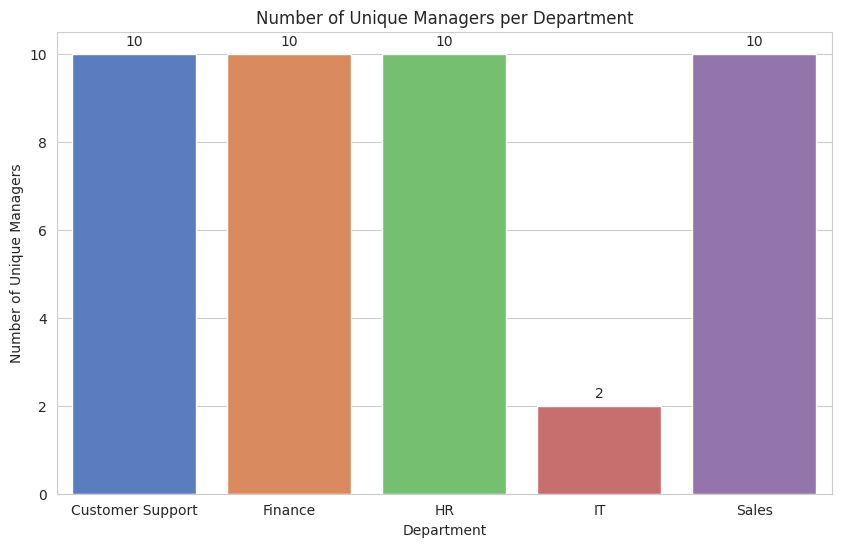

In [3]:
# Group by department and count unique managers
department_manager_counts = flag_data.groupby('department')['manager'].nunique().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='department', y='manager', data=department_manager_counts, palette="muted")

# Add title and labels to the plot
plt.title('Number of Unique Managers per Department')
plt.xlabel('Department')
plt.ylabel('Number of Unique Managers')

# Optional: add the exact number on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [4]:

{
    "data_type": "descriptive",
    "insight": "There is a disparity in Managerial Distribution across departments",
    "insight_value": {
        "description": "The IT department is markedly understaffed in terms of managerial positions, having only 2 managers, whereas departments such as Sales, Customer Support, Finance, and HR each have 10 managers. This significant discrepancy may indicate potential challenges in leadership distribution and workload management within the IT department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Unique Managers per Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Sales", "Customer Support", "Finance", "HR"],
            "description": "This axis categorizes the company's departments to show the number of managers responsible for each."
        },
        "y_axis": {
            "name": "Number of Managers",
            "value": "[2, 10, 10, 10, 10]",
            "description": "This axis displays the number of unique managers in each department, highlighting the disparities in managerial staffing."
        },
        "description": "The bar chart illustrates a stark contrast in the number of managers between the IT department and other departments. While IT has only 2 managers, other departments such as Sales, Customer Support, Finance, and HR are significantly better staffed, each with 10 managers."
    },
    "question": "How does the number of managers and their distribution across departments affect operational effectiveness?",
    "actionable_insight": {
        "description": "Given the low number of managers in the IT department, it is crucial for the organization to assess the impact of this disparity on the department's operational effectiveness, employee satisfaction, and overall workload distribution. The organization should consider either redistributing existing managerial resources or hiring additional managers in the IT department to balance leadership roles more evenly across departments. This adjustment could improve decision-making speed, team supervision, and resource allocation."
    }
}


{'data_type': 'descriptive',
 'insight': 'There is a disparity in Managerial Distribution across departments',
 'insight_value': {'description': 'The IT department is markedly understaffed in terms of managerial positions, having only 2 managers, whereas departments such as Sales, Customer Support, Finance, and HR each have 10 managers. This significant discrepancy may indicate potential challenges in leadership distribution and workload management within the IT department.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Unique Managers per Department',
  'x_axis': {'name': 'Department',
   'value': ['IT', 'Sales', 'Customer Support', 'Finance', 'HR'],
   'description': "This axis categorizes the company's departments to show the number of managers responsible for each."},
  'y_axis': {'name': 'Number of Managers',
   'value': '[2, 10, 10, 10, 10]',
   'description': 'This axis displays the number of unique managers in each department, highlighting the disparities in managerial 

### **Question 2:** How does employee retention vary across different locations, particularly in high-retention cities like Tokyo and London?

This analysis explores whether employees located in specific high-retention cities such as Tokyo and London tend to have longer schedules, indicating better retention compared to other locations. By examining this pattern, we can assess the impact of geographic location on employee stability and job satisfaction.

/tmp/ipykernel_30262/567775560.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_category', y='tenure_days', data=avg_tenure_by_location, palette='coolwarm')


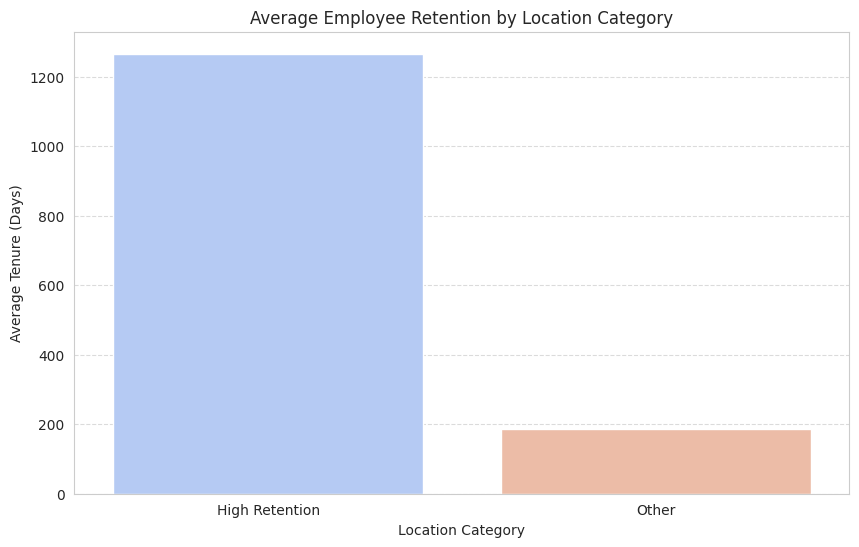

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'schedule' back to datetime format for visualization
df['schedule'] = pd.to_datetime(df['schedule'], errors='coerce')

# Filter data to include only the high-retention and other locations
df['location_category'] = df['location'].apply(lambda loc: 'High Retention' if 'Tokyo' in str(loc) or 'London' in str(loc) else 'Other')

# Calculate the average schedule length by location category
df['tenure_days'] = (pd.Timestamp('2024-10-29')- df['schedule']).dt.days
avg_tenure_by_location = df.groupby('location_category')['tenure_days'].mean().reset_index()

# Plot the average tenure by location category
plt.figure(figsize=(10, 6))
sns.barplot(x='location_category', y='tenure_days', data=avg_tenure_by_location, palette='coolwarm')
plt.title('Average Employee Retention by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Average Tenure (Days)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
{
    "data_type": "location-based retention analysis",
    "insight": "Employees located in high-retention locations tend to have significantly longer tenures compared to those in other locations.",
    "insight_value": {
        "High Retention Locations Average Tenure": "Approximately 1200 days",
        "Other Locations Average Tenure": "Approximately 200 days"
    },
    "plot": {
        "plot_type": "barplot",
        "title": "Average Employee Retention by Location Category",
        "x_axis": {
            "name": "Location Category",
            "value": "High Retention, Other",
            "description": "This axis represents the category of the employee's location, distinguishing between 'High Retention' and 'Other' locations."
        },
        "y_axis": {
            "name": "Average Tenure (Days)",
            "value": "Dynamic based on data",
            "description": "This shows the average tenure of employees in days, highlighting the difference in retention between high-retention and other locations."
        },
        "description": "The barplot shows a stark contrast in average tenure between high-retention locations and other locations, suggesting that geographic location plays a significant role in employee retention."
    },
    "question": "How does employee retention vary across different locations, particularly in high-retention areas?",
    "actionable insight": {
        "description": "Organizations may consider investigating the specific factors that contribute to higher retention in high-retention locations and implementing similar practices or policies in other locations to improve overall retention rates."
    }
}

{'data_type': 'location-based retention analysis',
 'insight': 'Employees located in high-retention locations tend to have significantly longer tenures compared to those in other locations.',
 'insight_value': {'High Retention Locations Average Tenure': 'Approximately 1200 days',
  'Other Locations Average Tenure': 'Approximately 200 days'},
 'plot': {'plot_type': 'barplot',
  'title': 'Average Employee Retention by Location Category',
  'x_axis': {'name': 'Location Category',
   'value': 'High Retention, Other',
   'description': "This axis represents the category of the employee's location, distinguishing between 'High Retention' and 'Other' locations."},
  'y_axis': {'name': 'Average Tenure (Days)',
   'value': 'Dynamic based on data',
   'description': 'This shows the average tenure of employees in days, highlighting the difference in retention between high-retention and other locations.'},
  'description': 'The barplot shows a stark contrast in average tenure between high-retentio

### **Question 3:  What is the distribution of reportees in the IT department compare to other departments?**


#### Average Number of Reportees per Manager by Department

This chart illustrates the average number of reportees managed by each manager within different departments. A higher average suggests a heavier managerial workload. This analysis is importnat for assessing the distribution of managerial responsibilities and identifying departments that may require staffing adjustments etc.


/tmp/ipykernel_30262/2927389314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='department', y='num_reportees', data=avg_reportees_per_manager, palette="muted")


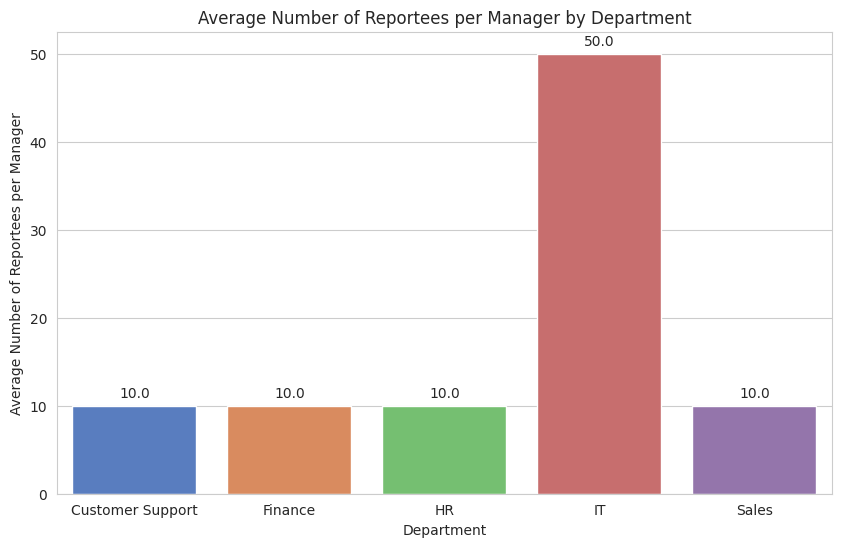

In [7]:
# Group by department and manager, and count the number of employees per manager
reportees_per_manager = flag_data.groupby(['department', 'manager']).size().reset_index(name='num_reportees')

# Calculate the average number of reportees per manager for each department
avg_reportees_per_manager = reportees_per_manager.groupby('department')['num_reportees'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='department', y='num_reportees', data=avg_reportees_per_manager, palette="muted")

# Add title and labels to the plot
plt.title('Average Number of Reportees per Manager by Department')
plt.xlabel('Department')
plt.ylabel('Average Number of Reportees per Manager')

# Optional: add the exact number on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "analytical",
    "insight": "There is a disproportionate high number of reportees per manager in the IT Department",
    "insight_value": {
        "description": "The average number of reportees per manager in the IT department is significantly higher at 50.5 compared to other departments. This is a stark contrast to Customer Support with 8.8, Finance with 11.6, HR with 12.8, and Sales with 13.0."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Number of Reportees per Manager by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Customer Support", "Finance", "HR", "Sales"],
            "description": "This axis lists the departments to compare the average number of reportees managed in each."
        },
        "y_axis": {
            "name": "Average Number of Reportees",
            "value": "[50, 10, 10, 10, 10]",
            "description": "This axis displays the average number of reportees per manager in each department, highlighting the discrepancy in workload distribution."
        },
        "description": "The bar chart vividly illustrates the disparity in the distribution of reportees per manager across departments, with the IT department notably overwhelmed compared to others. This discrepancy could be indicative of potential management and operational inefficiencies within the IT department."
    },
    "question": "What is the distribution of reportees in the IT department compared to other departments?",
    "actionable_insight": {
        "description": "Considering the high average number of reportees per manager in the IT department, it is advisable for the organization to reevaluate its staffing and managerial distribution strategies. Possible actions include hiring more managers within the IT department to reduce the current manager's workload, thereby potentially increasing oversight and improving management effectiveness. Additionally, the organization might explore restructuring or introducing more supportive roles to alleviate the burden on existing managers, ensuring a more equitable distribution of reportees and enhancing overall departmental performance."
    }
}


{'data_type': 'analytical',
 'insight': 'There is a disproportionate high number of reportees per manager in the IT Department',
 'insight_value': {'description': 'The average number of reportees per manager in the IT department is significantly higher at 50.5 compared to other departments. This is a stark contrast to Customer Support with 8.8, Finance with 11.6, HR with 12.8, and Sales with 13.0.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Number of Reportees per Manager by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT', 'Customer Support', 'Finance', 'HR', 'Sales'],
   'description': 'This axis lists the departments to compare the average number of reportees managed in each.'},
  'y_axis': {'name': 'Average Number of Reportees',
   'value': '[50, 10, 10, 10, 10]',
   'description': 'This axis displays the average number of reportees per manager in each department, highlighting the discrepancy in workload distribution.'},
  'description': 'The bar chart viv

### **Question 4:  Who are the managers with the highest number of reportees?**

#### Number of Reportees for Managers in IT Department

This bar plot shows the distribution of reportees among managers within the IT department. Highlighting number of individuals managed by each manager, the chart underscores any imbalances that perhaps may exist. Particularly, this chart is integral in identifying managers, who might be handling a disproportionately high number of reportees compared to peers. 

/tmp/ipykernel_30262/3070314287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='manager', y='num_reportees', data=reportees_per_manager, palette="muted")


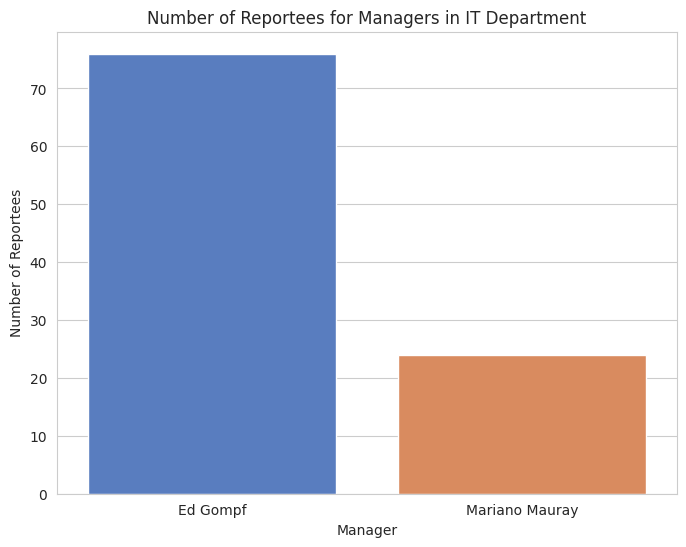

In [9]:
# Filter the data for the IT department
it_department_data = flag_data[flag_data['department'] == 'IT']

# Group by manager and count the number of reportees
reportees_per_manager = it_department_data.groupby('manager').size().reset_index(name='num_reportees')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='manager', y='num_reportees', data=reportees_per_manager, palette="muted")

# Add title and labels to the plot
plt.title('Number of Reportees for Managers in IT Department')
plt.xlabel('Manager')
plt.ylabel('Number of Reportees')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "There is a significant disparity among managers in terms of reportee numbers",
    "insight_value": {
        "description": "Within the IT department, there is a notable disparity in the distribution of reportees among managers. Ed Gompf manages a significantly higher number of reportees, totaling 76, which starkly contrasts with Mariano Mauray, who oversees 25 reportees."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Reportees per Manager in IT Department",
        "x_axis": {
            "name": "Manager",
            "value": ["Ed Gompf", "Mariano Mauray"],
            "description": "This axis lists the managers within the IT department who have the highest number of reportees."
        },
        "y_axis": {
            "name": "Number of Reportees",
            "value": "[76, 23]",
            "description": "This axis displays the number of reportees managed by each of the specified managers, highlighting the unequal workload distribution."
        },
        "description": "The bar chart clearly shows the significant burden on Ed Gompf compared to other managers within the same department, raising concerns about potential overburden and the need for more balanced management responsibilities."
    },
    "question": "Who are the managers with the highest number of reportees?",
    "actionable_insight": {
        "description": "The disparity in reportee distribution within the IT department suggests a need for reassessment of managerial assignments and potential restructuring. The organization should consider redistributing reportees more evenly among existing managers or hiring additional managerial staff to alleviate the burden on Ed Gompf. Such adjustments would not only promote fairness and potentially enhance employee satisfaction but also ensure that leadership responsibilities are more manageable, which could improve decision-making and team dynamics."
    }
}


{'data_type': 'diagnostic',
 'insight': 'There is a significant disparity among managers in terms of reportee numbers',
 'insight_value': {'description': 'Within the IT department, there is a notable disparity in the distribution of reportees among managers. Ed Gompf manages a significantly higher number of reportees, totaling 76, which starkly contrasts with Mariano Mauray, who oversees 25 reportees.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Reportees per Manager in IT Department',
  'x_axis': {'name': 'Manager',
   'value': ['Ed Gompf', 'Mariano Mauray'],
   'description': 'This axis lists the managers within the IT department who have the highest number of reportees.'},
  'y_axis': {'name': 'Number of Reportees',
   'value': '[76, 23]',
   'description': 'This axis displays the number of reportees managed by each of the specified managers, highlighting the unequal workload distribution.'},
  'description': 'The bar chart clearly shows the significant burden on Ed Gompf 

### **Question 5: What strategic changes can be made to improve managerial distribution and enhance departmental staffing?**


The current distribution of managers and reportees within the IT department highlights significant imbalances that could impact departmental effectiveness and employee morale.

To address the uneven managerial load and enhance operational effectiveness in the IT department, the organization should consider the following strategic changes: 1. Conduct a thorough review of current workload and managerial capacity to identify imbalances and potential areas of overload. 2. Implement a more equitable distribution of reportees among existing managers by reassigning team members based on current workload assessments. 3. Increase the number of managerial positions within the IT department to ensure a more manageable span of control and provide better support and oversight. 4. Offer leadership development programs to existing senior team members to prepare them for managerial roles, expanding the leadership base within the department. 5. Explore the use of technology and automation to reduce administrative burdens on managers, allowing them to focus more on leadership and strategic tasks. 6. Regularly monitor the effects of these changes on departmental performance and employee satisfaction to make further adjustments as necessary.

### Summary of Findings (Flag 37)

1. **Managerial Disparity and Geographic Influence**: The dataset highlights a significant lack of managerial positions within the IT department, similar to other departments, but with an added layer of complexity introduced by geographic location. Employees based in high-retention cities like Tokyo and London tend to have longer tenures, suggesting that geographic location influences retention patterns and potentially affects managerial workload distribution.

2. **Reportee Distribution**: The IT department remains markedly understaffed in terms of managerial positions, with an average of 50 reportees per manager. This issue is further exacerbated in high-retention locations where longer employee tenures may lead to increased workload and sustained pressure on managers over time.

3. **Individual Manager Analysis**: A disparity is observed within the IT department, where a manager named Ed Gompf handles a disproportionately high number of reportees. This situation is particularly concerning in high-retention locations, where Ed Gompf’s already heavy workload may be compounded by the longer tenures of his reportees, potentially leading to burnout and inefficiencies in management.